In [5]:
# Import necessary packages
import torch
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import os
import numpy as np

%matplotlib inline

In [6]:
class Args:
    test_image = 'noise2noise/data/test/volumeWithArtifacts_YZ.png'
    clean_image = 'noise2noise/data/GT/volumeWithBH_YZ.png'  # Optional: Path to ground truth clean image
    load_ckpt = 'ckpts/gaussian/n2n-gaussian.pt'
    show_output = 2
    cuda = torch.cuda.is_available()
    noise_type = 'gaussian'
    noise_param = 50
    seed = None
    crop_size = 256
    no_crop = True
    add_noise = False

params = Args()

# Load the Noise2Noise model
from noise2noise.noise2noise import Noise2Noise

# Load the model checkpoint
model = Noise2Noise(params, trainable=False)
model.load_model(params.load_ckpt)


Noise2Noise: Learning Image Restoration without Clean Data (Lethinen et al., 2018)
Loading checkpoint from: ckpts/gaussian/n2n-gaussian.pt


In [7]:
# Function to load and preprocess the image
def load_image(image_path):
    """Loads and preprocesses the image."""
    img = Image.open(image_path).convert('RGB')
    transform = transforms.ToTensor()
    img_tensor = transform(img).unsqueeze(0)  # Add batch dimension
    return img, img_tensor

# Load the test image
test_img, test_img_tensor = load_image(params.test_image)

# Move the test image to GPU if available
if params.cuda:
    test_img_tensor = test_img_tensor.cuda()

# Denoise the image
model.model.eval()
with torch.no_grad():
    denoised_img_tensor = model.model(test_img_tensor).cpu().squeeze()

# Convert the denoised image back to PIL format
denoised_img = transforms.ToPILImage()(denoised_img_tensor)

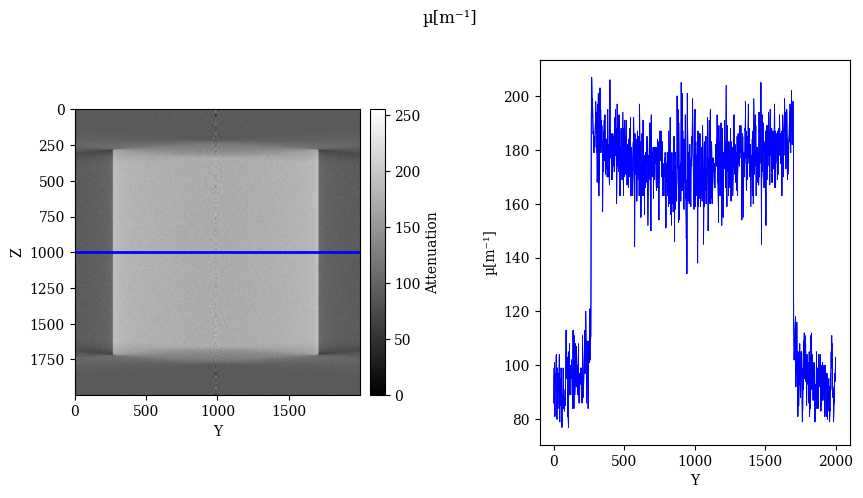

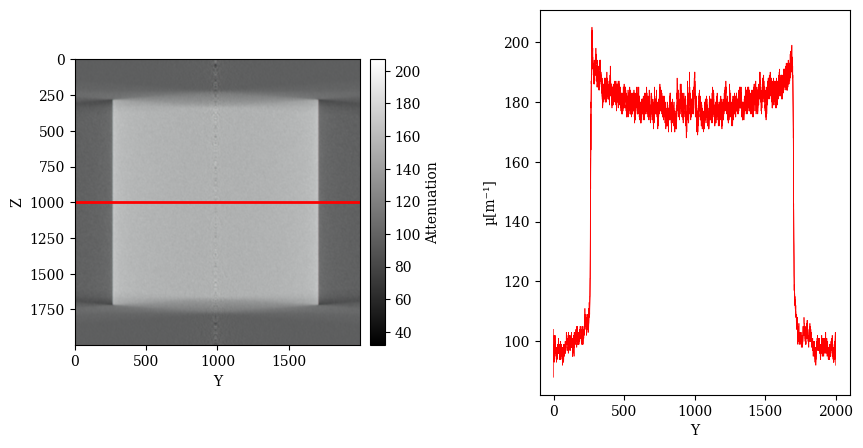

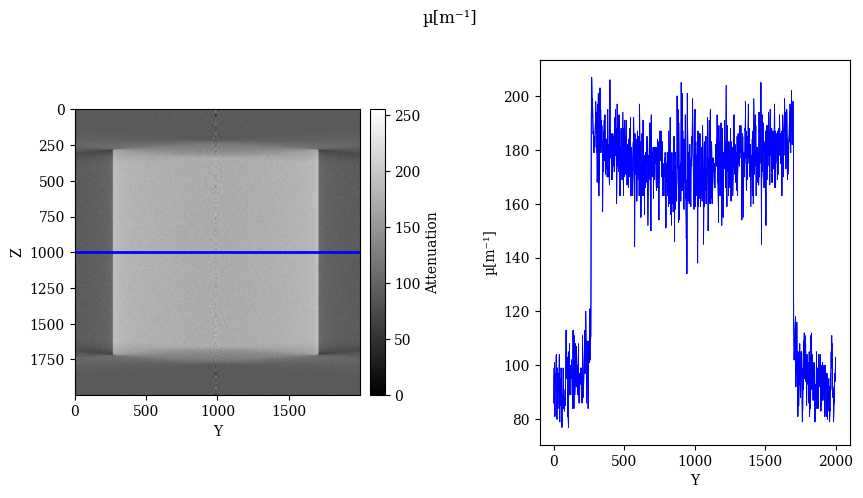

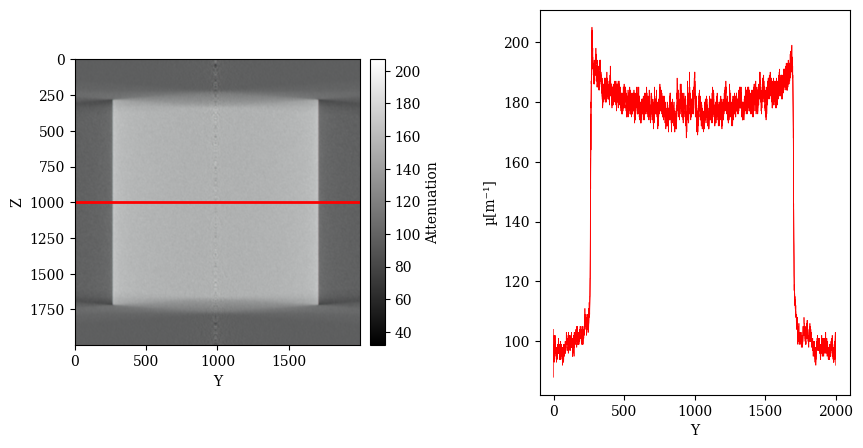

In [8]:
test_img = np.array(test_img)
denoised_img = np.array(denoised_img)


from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle("µ[m⁻¹]")
vmi = test_img.min()
vma = test_img.max()

im1 = ax[0].imshow(test_img,cmap='gray')
ax[0].axhline(y=test_img.shape[0] // 2, color='blue', lw=2,ls='-')

ax[0].set_xlabel('Y')
ax[0].set_ylabel('Z')
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(im1, cax=cax)
cbar.set_label('Attenuation')

ax[1].plot(test_img[test_img.shape[0] // 2],lw=0.5,ls='-',color='blue')
ax[1].set_ylabel('µ[m⁻¹]')
ax[1].set_xlabel('Y')
#fig.savefig(os.getcwd()+"/AttenuationPlot/Att_denoised-test_img1.png", bbox_inches='tight', pad_inches=0)
plt.subplots_adjust(wspace=0.5)
plt.show()


fig, ax = plt.subplots(1,2,figsize=(10,5))

im2 = ax[0].imshow(denoised_img,cmap='gray')
ax[0].axhline(y=denoised_img.shape[0] // 2, color='red', lw=2,ls='-')

ax[0].set_xlabel('Y')
ax[0].set_ylabel('Z')
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(im2, cax=cax)
cbar.set_label('Attenuation')

ax[1].plot(denoised_img[denoised_img.shape[0] // 2],lw=0.5,ls='-',color='red')
ax[1].set_ylabel('µ[m⁻¹]')
ax[1].set_xlabel('Y')
#fig.savefig(os.getcwd()+"/AttenuationPlot/Att_denoised-test_img2.png", bbox_inches='tight', pad_inches=0)
plt.subplots_adjust(wspace=0.5)
plt.show()

